In [60]:
%matplotlib inline
import pandas
from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import nn
import numpy as np
from os import walk
from os import path
import os
import matplotlib.pyplot as nlp

In [2]:
parasitized = np.empty([13132,150,150,3])
count=0
for root,dirs,names in walk(r'True_parasitized'):
    for name in names:
        img_dir = path.join(root, name)
        img = Image.open(img_dir).resize((150,150))
        parasitized[count]=np.array(img)/255
        count=count+1
        if count%1000==0:
            print(count)
        #np.append(parasitized, [np.array(img)], axis=0)
print(parasitized.shape)

(13132, 150, 150, 3)


In [6]:
non_parasitized = np.empty([13029,150,150,3])
count=0
for root,dirs,names in walk(r'True_uninfected'):
    for name in names:
        img_dir = path.join(root, name)
        img = Image.open(img_dir).resize((150,150))
        non_parasitized[count]=np.array(img)/255
        count=count+1
        if count%1000==0:
            print(count)
        #np.append(parasitized, [np.array(img)], axis=0)
print(non_parasitized.shape)

MemoryError: Unable to allocate 6.55 GiB for an array with shape (13029, 150, 150, 3) and data type float64

In [3]:
all_dirs = np.empty([len(os.listdir(r'True_uninfected'))+len(os.listdir(r'True_parasitized')),2],dtype=np.chararray)
i=0
for root,dirs,names in walk(r'True_uninfected'):
    for name in names:
        img_dir = os.path.join(root,name)
        all_dirs[i][0]=img_dir
        all_dirs[i][1]=0
        i=i+1
        if i%1000==0:
            print(f"[{i}/{len(all_dirs)}]")
for root,dirs,names in walk(r'True_parasitized'):
    for name in names:
        img_dir = os.path.join(root,name)
        all_dirs[i][0]=img_dir
        all_dirs[i][1]=1
        i=i+1
        if i%1000==0:
            print(f"[{i}/{len(all_dirs)}]")

[1000/26161]
[2000/26161]
[3000/26161]
[4000/26161]
[5000/26161]
[6000/26161]
[7000/26161]
[8000/26161]
[9000/26161]
[10000/26161]
[11000/26161]
[12000/26161]
[13000/26161]
[14000/26161]
[15000/26161]
[16000/26161]
[17000/26161]
[18000/26161]
[19000/26161]
[20000/26161]
[21000/26161]
[22000/26161]
[23000/26161]
[24000/26161]
[25000/26161]
[26000/26161]


In [29]:
class trainingData(Dataset):
    def __init__(self, feature_transform, target_transform):
        self.transform=feature_transform
        self.target_transform=target_transform
        #gonna try loading everything lazily, so ima skip init
        print('')
    def __len__(self):
        return len(os.listdir(r'True_uninfected'))+len(os.listdir(r'True_parasitized'))
    def __getitem__(self, idx):
        selected_dirs=[all_dirs[idx][0]]
        n=len(selected_dirs)
        
        images=np.empty([n,150,150,3])
        labels=np.empty([n])
        for i in range(n):
            img=Image.open(r''+str(selected_dirs[i])).resize((150,150))
            images[i]=np.array(img)
            labels[i]=all_dirs[idx][1]
        
        return images, labels

In [30]:
dataset = trainingData()
dataload = DataLoader(dataset, batch_size=64, shuffle=True)
vals=(next(iter(dataload)))

tensor([1.], dtype=torch.float64)


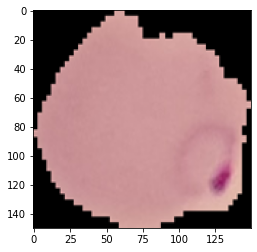

In [69]:
print(vals[1][15])
nlp.imshow(vals[0][15][0]/255)

In [63]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.layers=nn.Sequential(
            nn.Conv2d(3,1,5),
            nn.MaxPool2d(5)
        )
    def forward(self, x):
        return self.layers(x)

In [64]:
nn = net()
print(nn(vals[0][30]))

RuntimeError: Input type (double) and bias type (float) should be the same